In [160]:
import numpy as np
import pandas as pd

from scipy import stats
from sklearn import linear_model
from matplotlib import pyplot as plt

In [231]:
import matplotlib as mpl

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*3.5

plt.rcParams.update({"font.size": 3, "lines.linewidth": 1})

# for vk in plt.rcParams.items():
#     print(vk)

In [232]:
class PolyRegularRegression:

    def __init__(self, model, alfa: float, degree: int) -> None:
        
        self.model = model(alfa)
        self.degree = degree

    def fit(self, x: np.array, y: np.array):
        self.model.fit(self._polynomial(x), y)

    def predict(self, x: np.array):
        return self.model.predict(self._polynomial(x))

    def get_params(self):
        return self.model.get_params()

    def _polynomial(self, x: np.array) -> np.array:
        pol_x = np.array([x**(i + 1) for i in range(self.degree)]).T
        return pol_x


In [233]:
models = {
    "redge": linear_model.Ridge,
    "lasso": linear_model.Lasso
}

data = np.array([
    [-2, -7],
    [-1, 0],
    [0, 1],
    [1, 2],
    [2, 9]])

sigmas = [0.1, 0.2, 0.3]

noises = [stats.norm.rvs(size=len(data), scale=var) for var in sigmas]
opt_nois = noises[0]
x = data[:, 0]
y = data[:, 1]

degree = 11

alfas = [1, 0.1, 0.01, 0.001]
opt_alfa = 0.01

x_test = np.linspace(-2, 2, 100)

/home/aser/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.578e-02, tolerance: 1.267e-02
  model = cd_fast.enet_coordinate_descent(


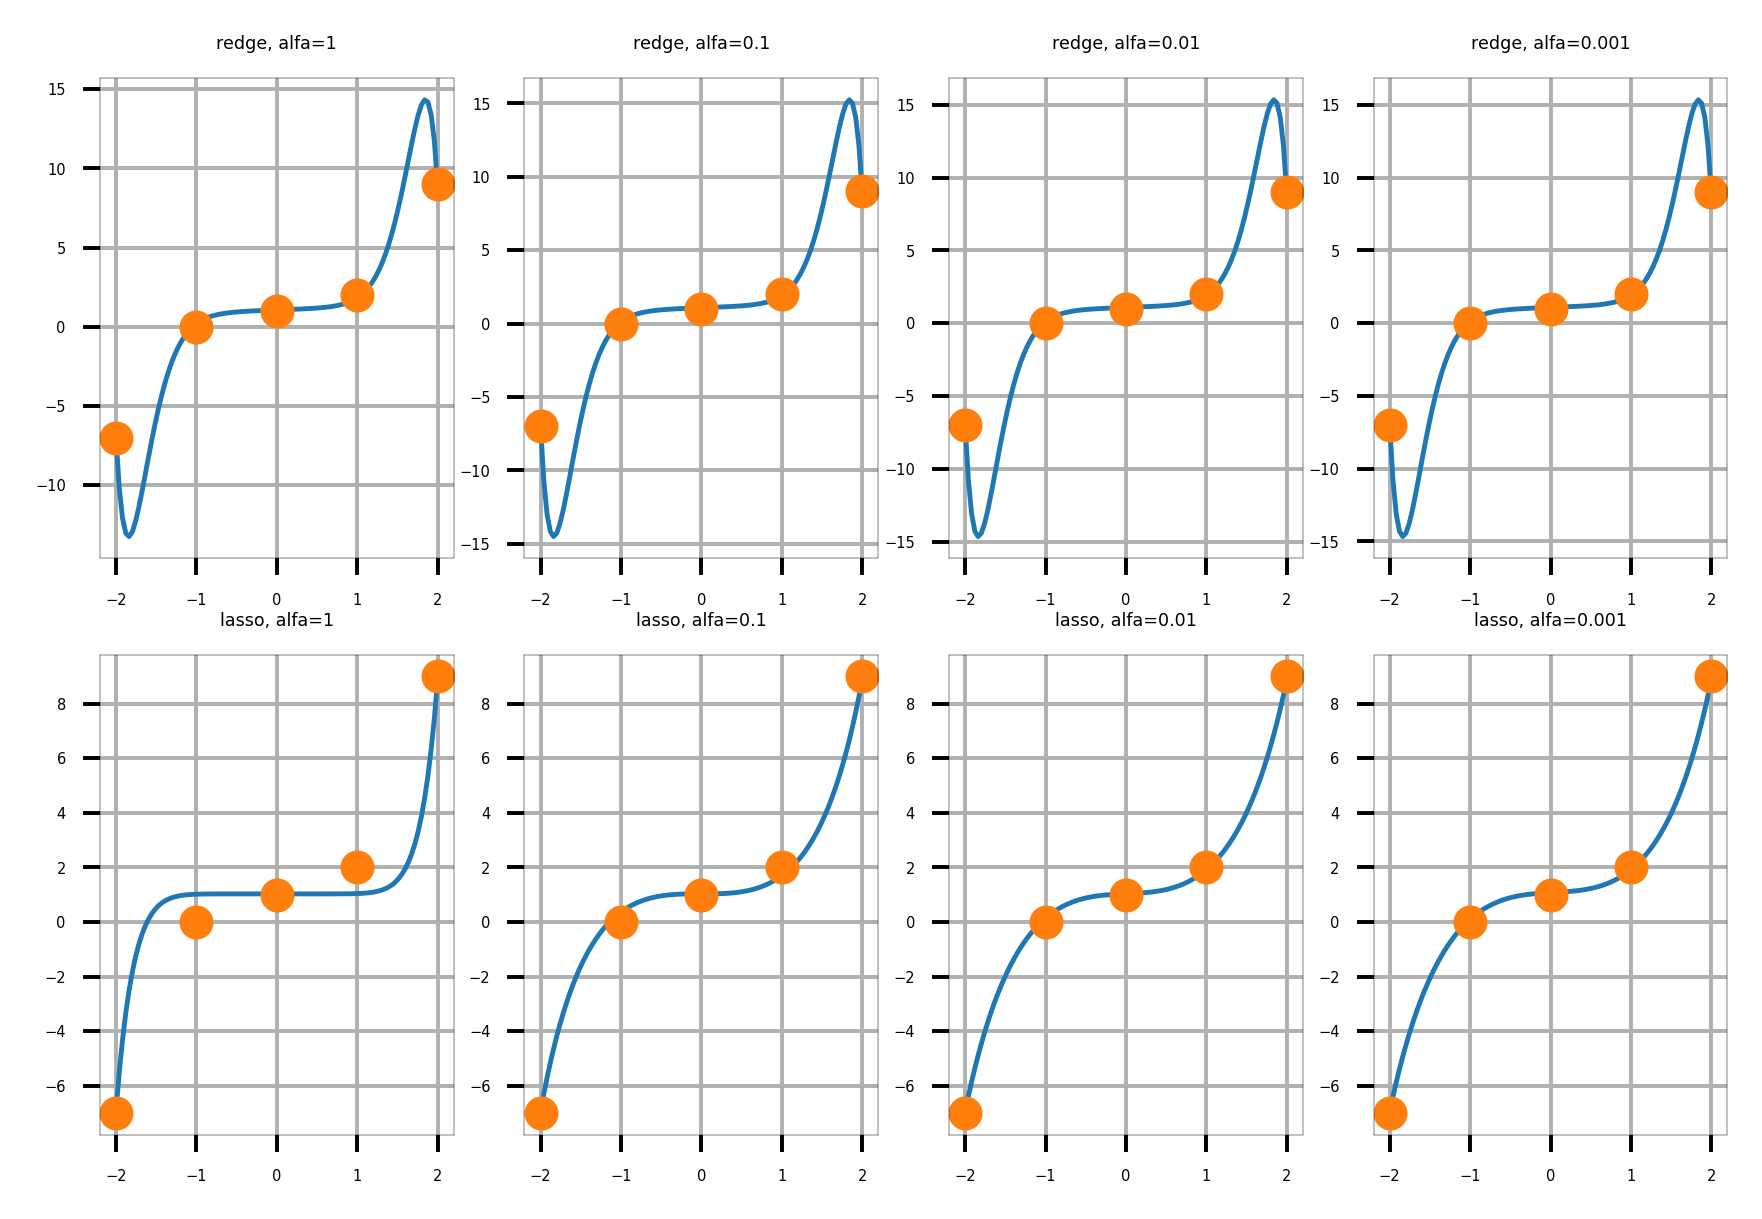

In [234]:
fig, axs = plt.subplots(len(models), len(alfas))
params = pd.DataFrame()

for i, alfa in enumerate(alfas):
    for j, (model_name, model_class) in enumerate(models.items()):
        name = f"{model_name}, alfa={alfa}"

        model = PolyRegularRegression(model=model_class, alfa=alfa, degree=degree)
        model.fit(x, y + opt_nois)
        
        axs[j, i].plot(x_test, model.predict(x_test))
        axs[j, i].plot(x, y, "o")
        axs[j, i].set_title(name)
        axs[j, i].grid()
        
        params[name] = model.model.coef_


In [235]:
for name in params:
    params[name].apply(lambda x: None if x == 0. else x)
params

,"redge, alfa=1","lasso, alfa=1","redge, alfa=0.1","lasso, alfa=0.1","redge, alfa=0.01","lasso, alfa=0.01","redge, alfa=0.001","lasso, alfa=0.001"
0,0.187538,0.000000,0.206787,0.000000,0.208931,1.314687e-01,0.209148,0.159307
1,-0.015728,-0.000000,-0.021808,-0.000000,-0.022685,-0.000000e+00,-0.022777,-0.075304
2,0.186861,0.000000,0.206039,0.585434,0.208176,7.062187e-01,0.208392,0.701074
3,-0.015498,-0.000000,-0.021489,-0.000000,-0.022353,-3.441098e-03,-0.022443,0.006582
4,0.184154,0.000000,0.203050,0.075746,0.205155,4.685158e-02,0.205368,0.046510
5,-0.014577,-0.000000,-0.020211,-0.000000,-0.021023,-1.782194e-04,-0.021108,0.001004
6,0.173324,0.000000,0.191091,0.004752,0.193071,2.939483e-03,0.193271,0.002918
7,-0.010894,-0.000000,-0.015100,-0.000000,-0.015706,-1.062462e-05,-0.015770,0.000060
8,0.130006,0.010744,0.143258,0.000297,0.144734,1.837618e-04,0.144883,0.000182
9,0.003838,-0.000062,0.005345,-0.000066,0.005563,-6.562871e-07,0.005586,0.000004


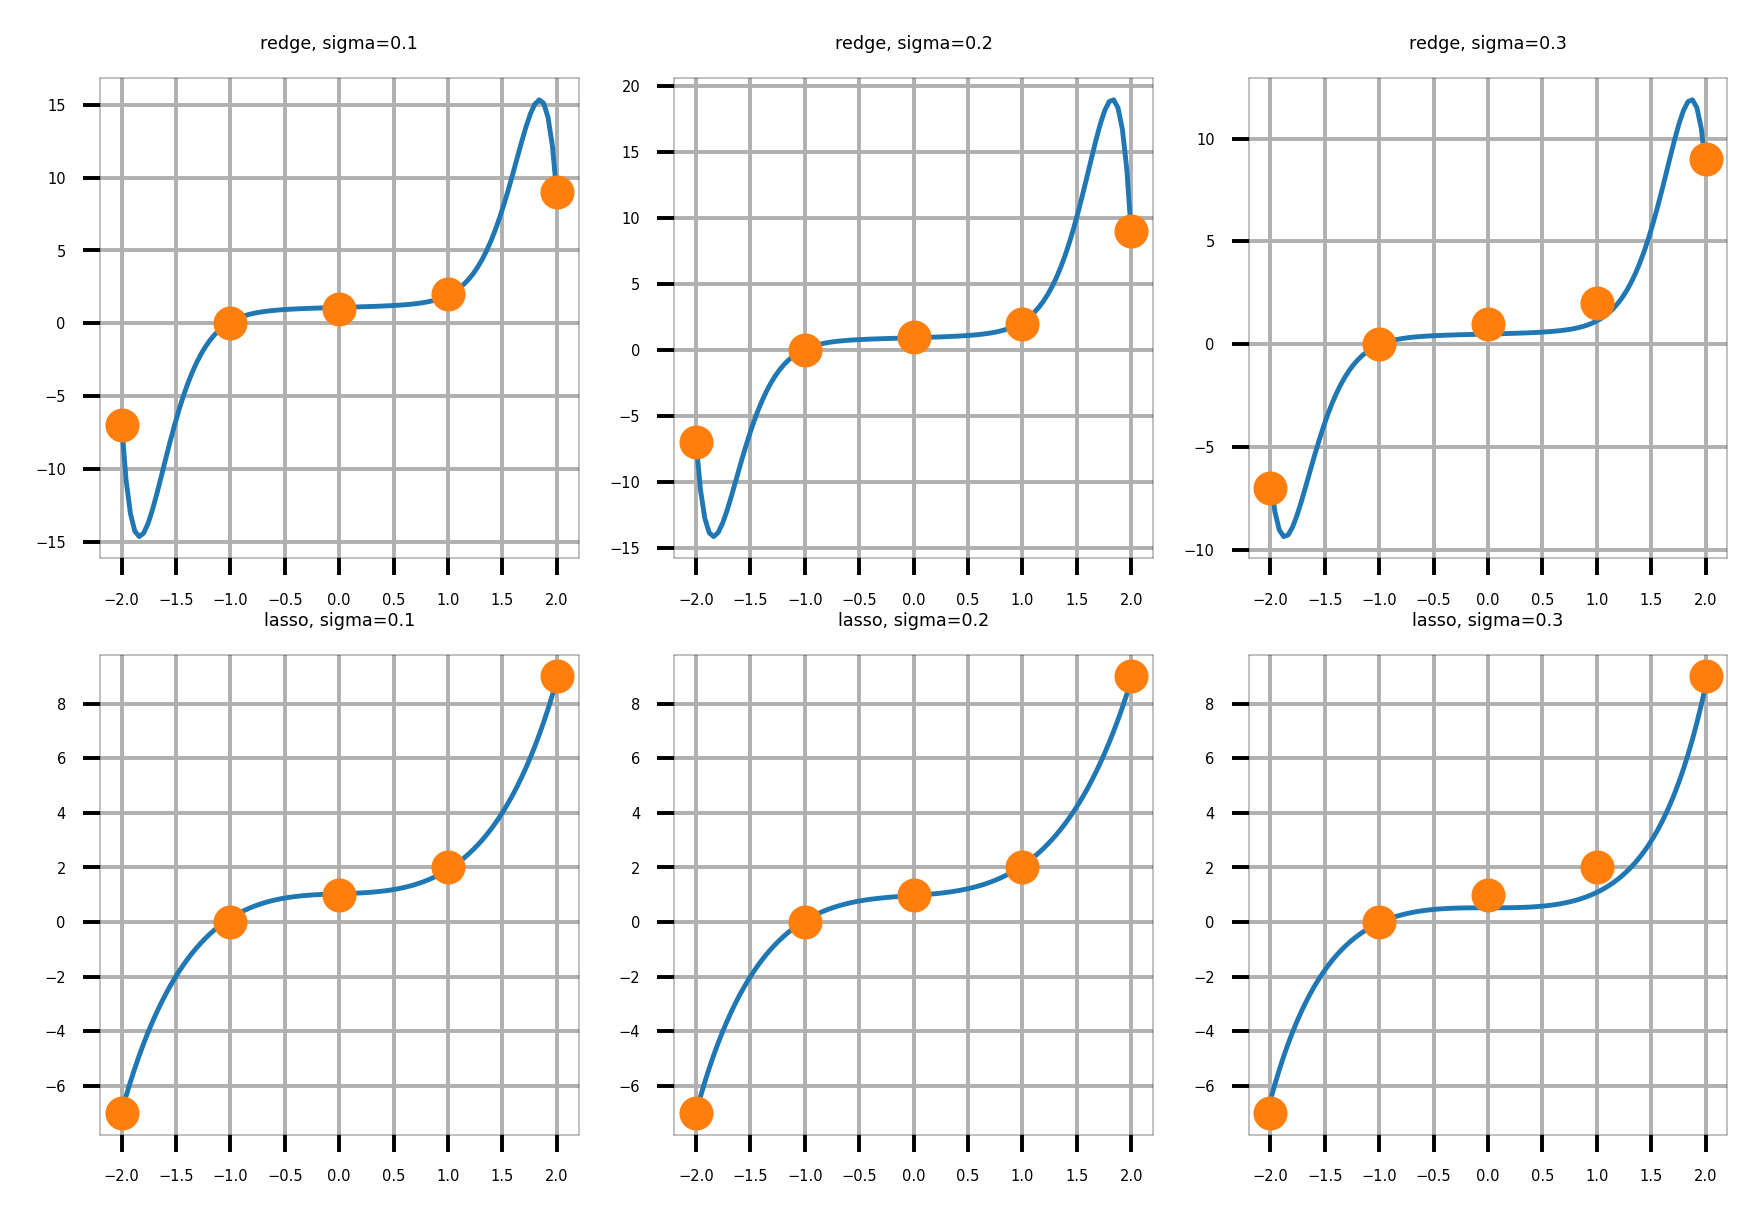

In [236]:


fig, axs = plt.subplots(len(models), len(noises))
params = pd.DataFrame()

for i, nois in enumerate(noises):
    for j, (model_name, model_class) in enumerate(models.items()):
        name = f"{model_name}, sigma={sigmas[i]}"

        model = PolyRegularRegression(model=model_class, alfa=opt_alfa, degree=degree)
        model.fit(x, y + nois)
        
        axs[j, i].grid()
        axs[j, i].plot(x_test, model.predict(x_test))
        axs[j, i].plot(x, y, "o")
        axs[j, i].set_title(name)
        params[name] = model.model.coef_


    

In [237]:
for name in params:
    params[name].apply(lambda x: None if x == 0. else x)
params

,"redge, sigma=0.1","lasso, sigma=0.1","redge, sigma=0.2","lasso, sigma=0.2","redge, sigma=0.3","lasso, sigma=0.3"
0,0.208931,1.314687e-01,0.236564,0.280024,0.132499,0.000000
1,-0.022685,-0.000000e+00,0.048611,0.091817,0.016931,0.000000
2,0.208176,7.062187e-01,0.235707,0.679441,0.132024,0.460157
3,-0.022353,-3.441098e-03,0.047896,0.000000,0.016688,0.000000
4,0.205155,4.685158e-02,0.232281,0.045075,0.130122,0.091906
5,-0.021023,-1.782194e-04,0.045037,-0.004490,0.015717,0.006326
6,0.193071,2.939483e-03,0.218576,0.002828,0.122514,0.005766
7,-0.015706,-1.062462e-05,0.033603,-0.000353,0.011834,0.000458
8,0.144734,1.837618e-04,0.163757,0.000177,0.092081,0.000360
9,0.005563,-6.562871e-07,-0.012136,-0.000022,-0.003697,0.000028
